# Aim:

The following project focus on the analysis of a dataset 'Bank Marketing' which contains data about customers and aims to get useful insights from it and predict if a customer will accept a deposit offer or not.

# Dataset Used:

Bank marketing dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives information about a marketing campaign of a financial institution.    

Numeric - age, balance, campaign, pdays, previous    
Categorical - marital, education, default (credit), housing, loan, contact, month, day_of_week, duration, postcome    
Target - deposit.

# Dataset Cleaning:

The data is read from Google Drive and different preprocessing were done.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [ ]:
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Econometrics/bank.csv")

In [ ]:
df = data.copy()

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

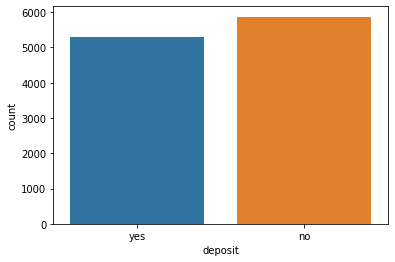

In [ ]:
sns.countplot(x = "deposit",data = data)

The dataset is well balanced.

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data["day"] = data["day"].astype('object')

Day is given as int. Day must be an object type.

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


There are no null values in the dataset. Also there are no duplicate values present in it. We can go down to Exploratory Data Analysis.

# Exploratory Data Analysis

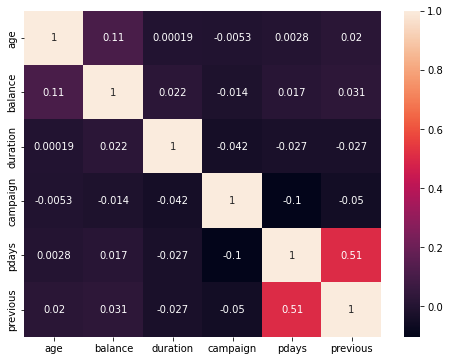

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(),annot = True)

- There is no significant inter correlation among the variables, other than pdays and previous.
- That is expected, as it is mentioned that pdays = -1 means that the customer have not been contaced yet and previous will be 0.

In [ ]:
def analyzeContinuous(col,title,df = data):
  plt.figure(figsize = (8,6))
  mean = np.round(df[col].mean(),3)
  median = np.round(df[col].median(),3)
  mode = df[col].mode()[0]

  sns.distplot(df[col])
  plt.axvline(mean,color = '#ba2d52',label = "Mean: " + str(mean))
  plt.axvline(median,color = '#d052d9',label = "Medain: " + str(median))
  plt.axvline(mode,color = '#8cf59a',label = "Mode: " + str(mode))
  plt.title(title)
  plt.legend()

*The Function above is used for creating plots for continuous values. The function can be called with any continuous value present in the data, to get its distribution plots.*

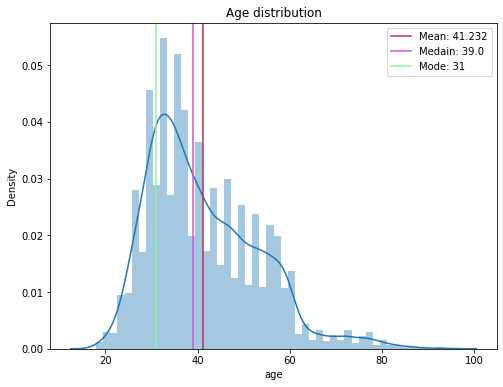

In [ ]:
analyzeContinuous("age","Age distribution")

Age is Skewed to the right. The mean and median age are close but mode is low. People the age of 20 and above are contacted. People at the age 32 are contacted more frequently. People above the age of 60 is not contacted as frequent as other young customers.

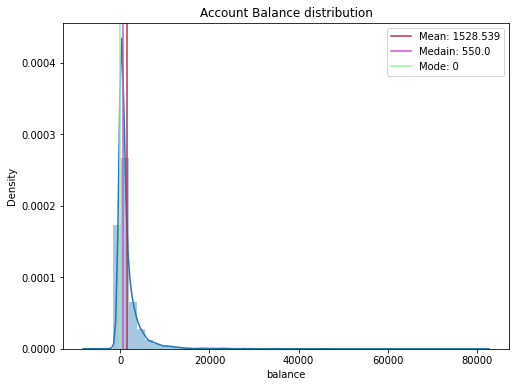

In [ ]:
analyzeContinuous("balance","Account Balance distribution")

Balance is highly right skewed. The mean balance is 1528. There are few people with high balance amount, this is why the right tail goes around 80000 and few people are having negative balance. Most people have 0 balance.

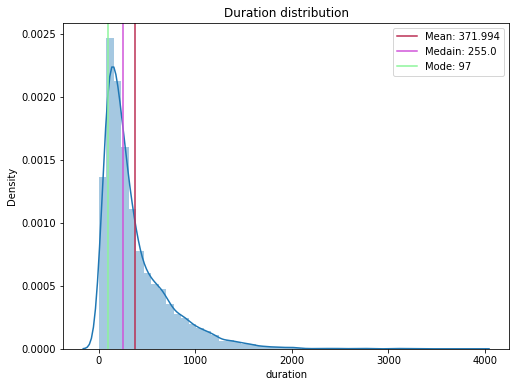

In [ ]:
analyzeContinuous("duration","Duration distribution")

Most call durations are 97 seconds. Suggesting most people end the call within the first 2 minutes of the campaign. The average time a customer is engaged is 6 minutes.

In [ ]:
print(f" New Customers contaced : {sum(data['pdays'] == -1)}")
print(f" New Customers percentage : {np.round(sum(data['pdays'] == -1)/data.shape[0] * 100,3)} %")

 New Customers contaced : 8324
 New Customers percentage : 74.574 %


Almost 75 % of the contacted persons are contacted for the first time.

In [ ]:
def analyzeCategorical(col,title = "",df = data):
  plt.figure(figsize = (8,6))
  sns.countplot(x = col,hue = "deposit",data = df)
  plt.xticks(rotation = 45)
  plt.title(title)

*This function is used for plotting categorical data.*

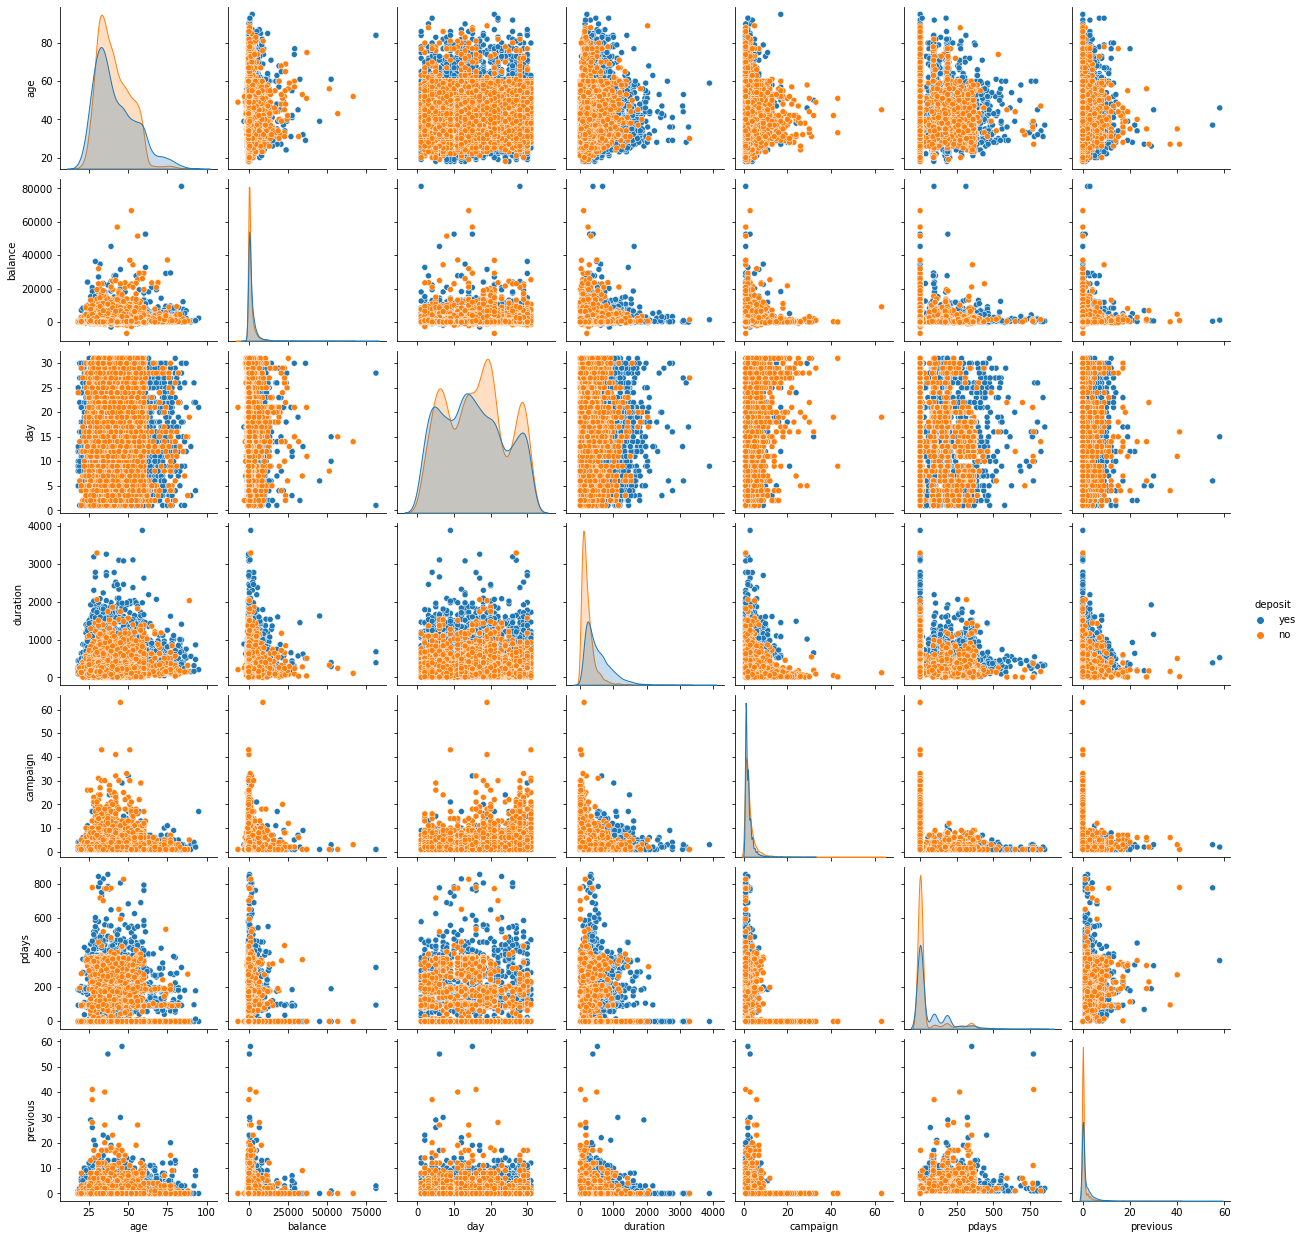

In [ ]:
sns.pairplot(data,hue = "deposit")

- Most of the plots in pair plot are overlapping.
- That is both yes and no response have similar distribution among continuous variables.
- Few Yes classes have higher values in some of the pairs.
- It is difficult to draw inferences from this pair plot

*Since loan is one of the key factors, lets see how it affects the deposit.*

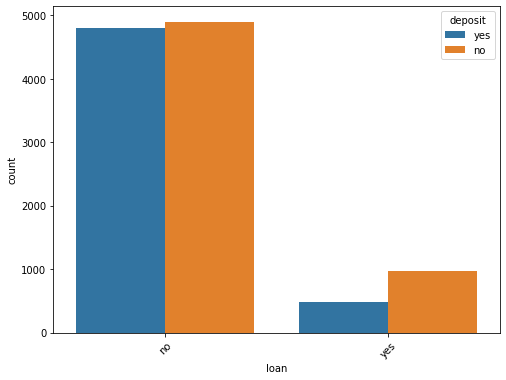

In [ ]:
analyzeCategorical("loan")

Customers with personal loan tends to reject the deposit more.

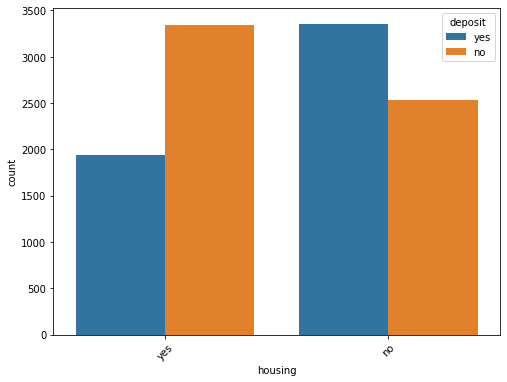

In [ ]:
analyzeCategorical("housing")

The same is the case with Housing loan. People with housing loan tends to reject the deposit.

In [ ]:
new_cust = data["pdays"] == -1
new_cust = new_cust.map({True:1,False:0})
data["new_cust"] = new_cust

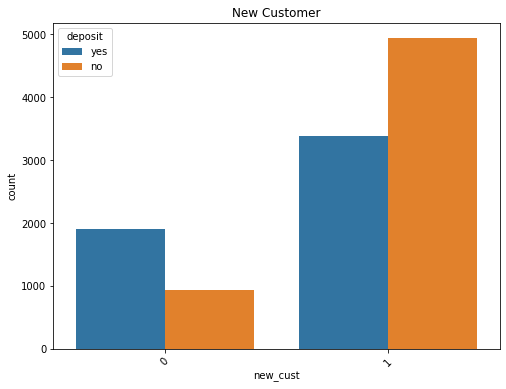

In [ ]:
analyzeCategorical("new_cust","New Customer")

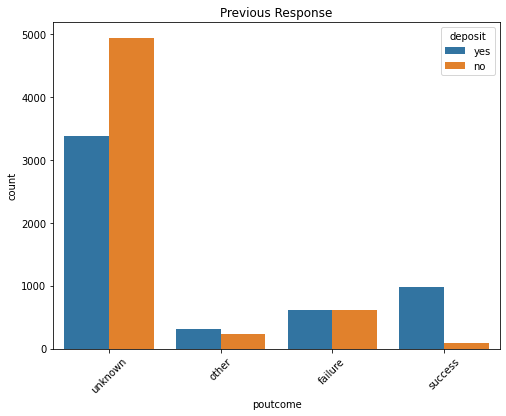

In [ ]:
analyzeCategorical("poutcome","Previous Response")

New customers are more rejecting. Customers who where previously contacted seems to again accept the deposit. Also people who deposited during the last contact tends to again deposit for the term.

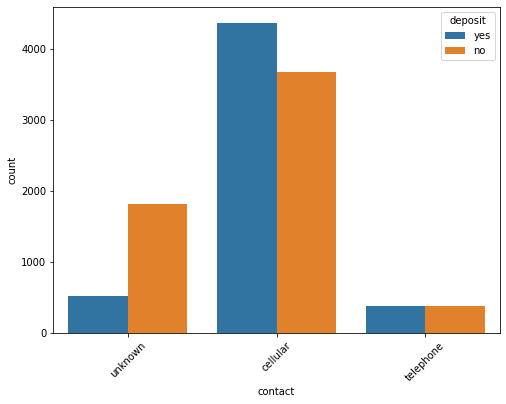

In [ ]:
analyzeCategorical("contact")

Customers who were contacted via cellular are more accepting.

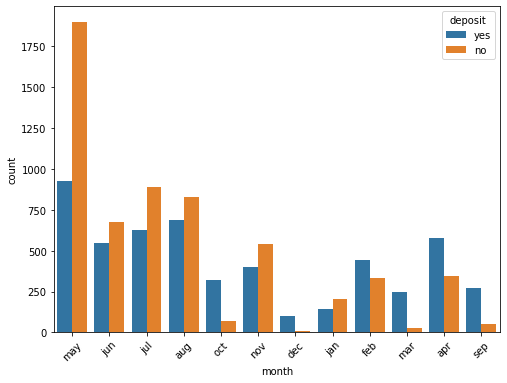

In [ ]:
analyzeCategorical("month")

People accept the term deposit more in the months of February, March, April, September, October, and December

Let's see how people within an age group respond

In [ ]:
age_cat = pd.cut(data["age"],bins = [17,30,55,80,np.inf],labels = ["18-30","30-55","55-80",">80"])
data["age_cat"] = age_cat

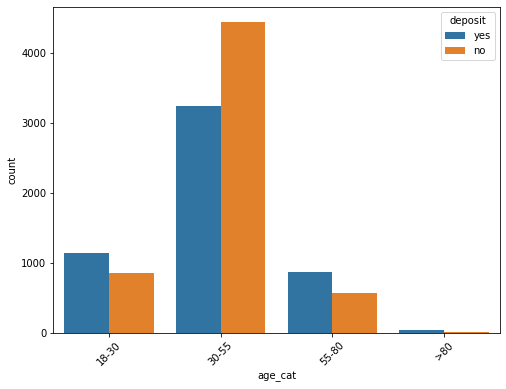

In [ ]:
analyzeCategorical("age_cat")

Most people in their middle age are rejecting deposit. Young people and old(retired) people are more accepting the deposit.

## Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df['deposit'] = df['deposit'].map({'yes':1,'no':0})

processed_data = pd.get_dummies(df,drop_first = True)

scaler=StandardScaler()

- Encoding 'Yes' and 'No' to 1 and 0.
- One hot encoding is done on categorical variables using get_dummies.
- This increases the no of features to 41 (after dropping deposit and pdays)

In [ ]:
processed_data.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


This is the final processed data.

In [ ]:
np.random.seed(142)
X = processed_data.drop(['deposit','pdays'],axis = 1)
y = processed_data['deposit']
X = scaler.fit_transform(X)

The processed data is scaled to have similar range of values. Scaling will help in improving the accuracy of the model.

In [ ]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=4)

The data is then split into test and train. The test size is 33% of the original data.

# Model Building

Two models were built on the dataset. First a Decision tree was fit on the data. Then required changes were done accordingly. After that a Logistic regression model was built. The models are also evaluated using metrics.

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Decision Tree

Train Score:  100.0
Test Score:  77.171552660152
Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      1924
           1       0.76      0.76      0.76      1760

    accuracy                           0.77      3684
   macro avg       0.77      0.77      0.77      3684
weighted avg       0.77      0.77      0.77      3684

Cross Validation Score :  0.774703222575704


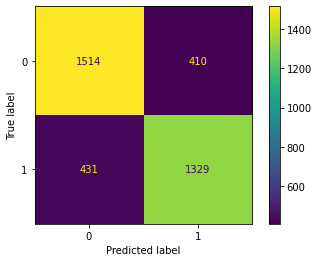

In [ ]:
dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
print("Train Score: ",dt.score(X_train,y_train)*100)
print("Test Score: ",dt.score(X_test,y_test)*100)

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print("Report: \n", classification_report(y_test, y_pred))
print("Cross Validation Score : ", cross_val_score(dt, X_test, y_test, cv=10).mean())

Inference

- The model is overfitting.
- The train score is 100 % and test score is 78.6 %.
- The model has learned the patterns in train data and tends to fit it well.
- Thus it fails to predict propelry in unseen, new data.

We can use HyperParameter Tuning algorithms, like GridSearchCV and RandomSearchCV for finding the best parameters that will give good accuracy for the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# We pass this various parameters for the GridSearchCV algorithm to find the best fitting parameters
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,8,10,None],
    "min_samples_leaf": [1,2,5,None],
    "max_features": [2,4,6,None]
}

clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs = -1, cv = 5).fit(X_train, y_train)

print("Best Parameters from the GridSearch", grid_cv.best_params_)
print("Train score for GridSearch: ", accuracy_score(y_train, grid_cv.predict(X_train)))
print("Test score for GridSearch: ", accuracy_score(y_test, grid_cv.predict(X_test)))
print("Cross Validation score: ", grid_cv.best_score_)

Best Parameters from the GridSearch {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 8}
Train score for GridSearch:  0.8673442096817331
Test score for GridSearch:  0.8094462540716613
Cross Validation score:  0.8159972636059593


Train Score:  86.73442096817331
Test Score:  80.94462540716613
Report: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1924
           1       0.80      0.80      0.80      1760

    accuracy                           0.81      3684
   macro avg       0.81      0.81      0.81      3684
weighted avg       0.81      0.81      0.81      3684

Cross Validation Score:  81.59972636059592


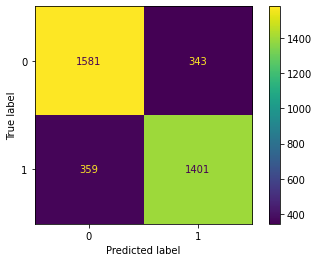

In [ ]:
print("Train Score: ",grid_cv.score(X_train,y_train)*100)
print("Test Score: ",grid_cv.score(X_test,y_test)*100)

y_pred = grid_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print("Report: \n", classification_report(y_test, y_pred))
print("Cross Validation Score: ", grid_cv.best_score_ * 100)

dt_roc_auc = roc_auc_score(y_test, y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test, grid_cv.predict_proba(X_test)[:,1])

After fitting the decision tree with correct parameters, the model is giving good results. The Difference between test and train score is < 5% and The cross validation scores are almost same.

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Train Score:  82.65579031826692
Test Score:  82.32899022801303
Report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1924
           1       0.83      0.79      0.81      1760

    accuracy                           0.82      3684
   macro avg       0.82      0.82      0.82      3684
weighted avg       0.82      0.82      0.82      3684

Cross Validation Score:  82.27450807116767


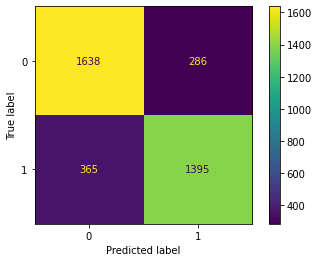

In [ ]:
y_pred = lr.predict(X_test)

print("Train Score: ",lr.score(X_train,y_train)*100)
print("Test Score: ",lr.score(X_test,y_test)*100)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print("Report: \n", classification_report(y_test, y_pred))
print("Cross Validation Score: ", cross_val_score(lr, X_test, y_test, cv = 10).mean() * 100)

Logistic regression has similar training and testing score.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_iter":[100,150,200,250],
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

clf = LogisticRegression()
grid_cv1 = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs = -1, cv = 5).fit(X_train, y_train)

print("Best Parameters from the GridSearch", grid_cv1.best_params_)
print("Train score for GridSearch: ", accuracy_score(y_train, grid_cv1.predict(X_train)))
print("Test score for GridSearch: ", accuracy_score(y_test, grid_cv1.predict(X_test)))
print("Cross Validation score: ", grid_cv1.best_score_)

Best Parameters from the GridSearch {'max_iter': 100, 'solver': 'newton-cg'}
Train score for GridSearch:  0.8265579031826692
Test score for GridSearch:  0.8232899022801303
Cross Validation score:  0.8213451254627726


After fitting the models we are comparing the models using ROC curves.

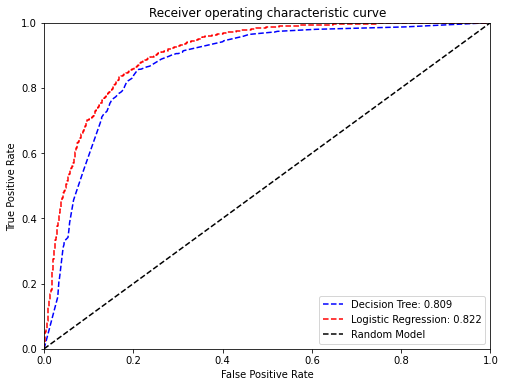

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.figure(figsize = (8,6))
plt.plot(fpr1, tpr1, 'b--', label = f'Decision Tree: {np.round(dt_roc_auc,3)}')
plt.plot(fpr2, tpr2, 'r--', label = f'Logistic Regression: {np.round(logit_roc_auc,3)}')
plt.plot([0, 1], [0, 1],'k--',label = 'Random Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Receiver operating characteristic curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

- The Models perofrm well, Logistic Regression performs better than Decision Tree.
- The AUC tells the ability of the algorithms to distinguish between the two classes.
- Both model have good AUC and can well distinguish between the classes.

## Extracting Decision Rules

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 10, max_features = None, min_samples_leaf =  5, min_samples_split = 2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [ ]:
# https://mljar.com/blog/extract-rules-decision-tree/
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

The above function is used for getting the Rules of the Fitted Decision Tree.

In [ ]:
feature_names = list(processed_data.columns)
feature_names.remove('pdays')
feature_names.remove('deposit')

In [ ]:
from sklearn.tree import _tree
rules = get_rules(dtree,feature_names,["No","Yes"])

In [ ]:
for i in range(5):
  print(f"Rule {i + 1}: {rules[i]}")
  print()

Rule 1: if (duration <= -0.477) and (poutcome_success <= 1.372) and (month_mar <= 3.061) and (month_oct <= 2.525) and (duration <= -0.748) and (month_feb <= 1.693) and (age > -1.488) and (duration <= -0.817) and (month_sep <= 2.829) and (age <= 1.743) then class: No (proba: 99.04%) | based on 835 samples

Rule 2: if (duration > -0.477) and (duration <= 0.246) and (contact_unknown <= 0.711) and (poutcome_success <= 1.372) and (housing_yes <= 0.054) and (balance > -0.453) and (loan_yes <= 1.095) and (month_aug <= 1.061) and (month_nov <= 1.494) and (month_jan <= 2.715) then class: Yes (proba: 80.41%) | based on 541 samples

Rule 3: if (duration <= -0.477) and (poutcome_success <= 1.372) and (month_mar <= 3.061) and (month_oct <= 2.525) and (duration > -0.748) and (housing_yes <= 0.054) and (age > -1.069) and (previous <= 0.291) and (age <= 1.617) and (balance <= 0.526) then class: No (proba: 84.74%) | based on 439 samples

Rule 4: if (duration <= -0.477) and (poutcome_success <= 1.372) a

- We are printing out the first 5 rules of the Decision tree.
- Duration is the main feature in all the rules. Followed by Postoutcome.
- These 2 features are mainly contributing for the outcome of the input given.

### Feature Importance

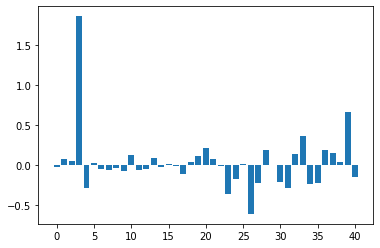

In [ ]:
importance = lr.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- From the feature importance plot we can see duration attribute has the highest coefficient.
- Postcome of the last campaign is the second highest.
- Some attributes do have negative coefficients.
- Housing loan makes the most negative impact.

The Feature importance inference and the Decision rules derived, both have similar results.

# Conclusion:

Both Decision Tree and Logistic regression has similar results. They have similar accuracies and ROC curves. The Decision rules formed were in accord with the feature importance plot and the EDA performed.

To have an successful campaign:

- The target audience must be young age and elderly(retired) people.
- Their previous Outcome to be positive.
- The Customer must be engaged for atleast 6 minutes.